In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [55]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [56]:
# 1. LOAD AND EXPLORE THE DATASET
print("STEP 1: LOADING DATASET")
df = pd.read_csv('heart.csv')

print(f"\nDataset Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")

STEP 1: LOADING DATASET

Dataset Shape: (1025, 14)
Total Rows: 1025, Total Columns: 14


In [57]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [58]:

print("\nDataset Information:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Basic Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0

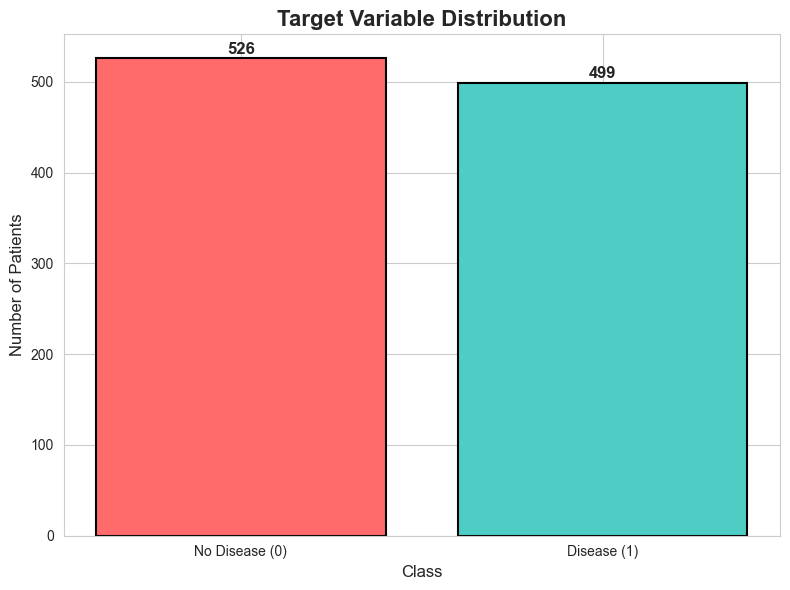

In [59]:

# Visualization 1: Target Variable Distribution
plt.figure(figsize=(8, 6))
target_counts = df['target'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
plt.bar(['No Disease (0)', 'Disease (1)'], target_counts.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Target Variable Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Class', fontsize=12)
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

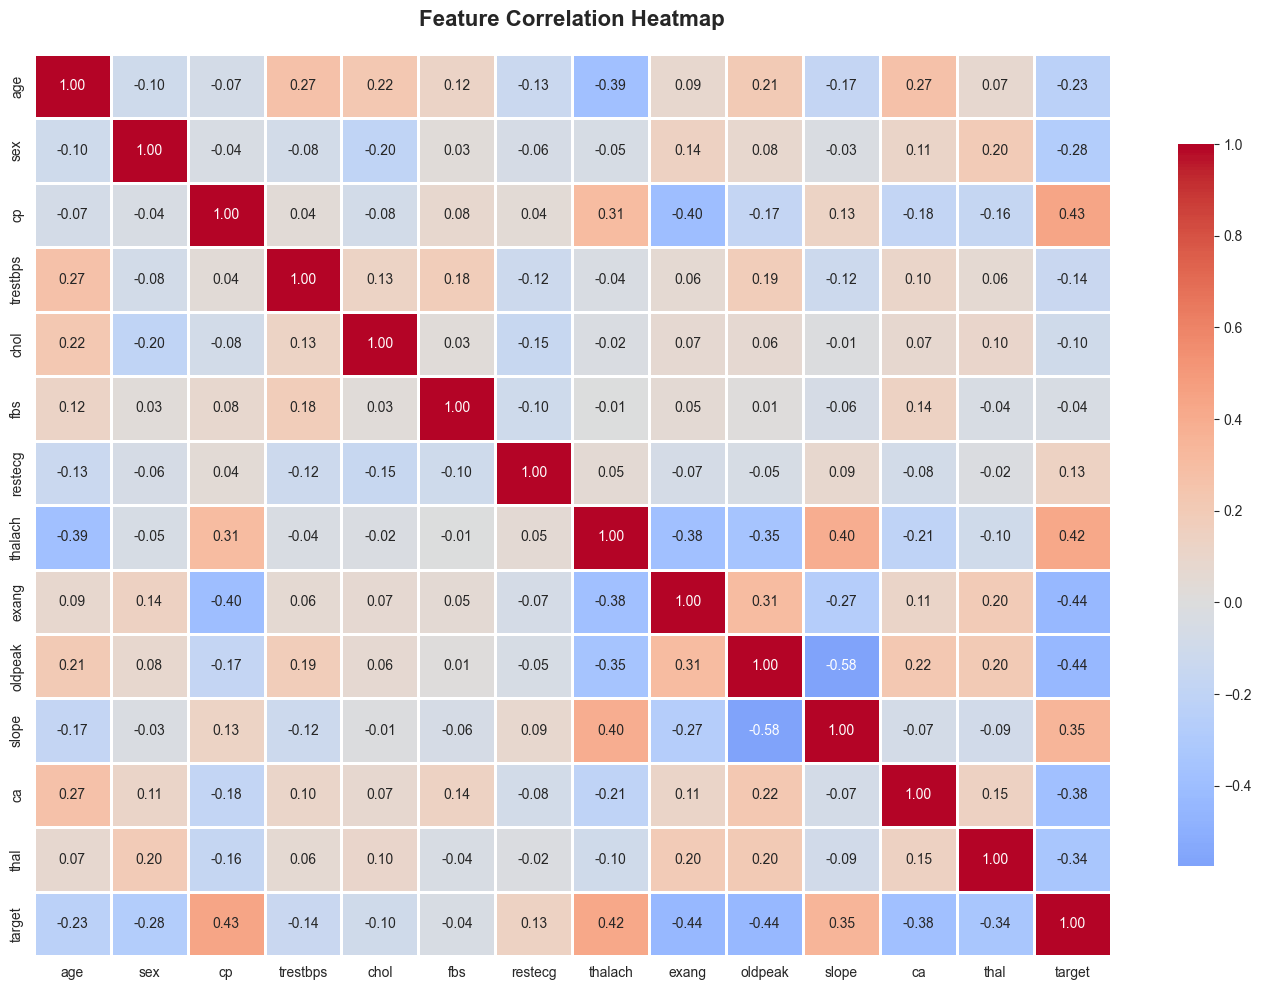

In [60]:
# Visualization 2: Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [61]:

# 2. DATA PREPROCESSING

print("STEP 2: DATA PREPROCESSING")

# Check for missing values
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print("⚠ Missing values detected. Handling them...")
    df = df.dropna()

STEP 2: DATA PREPROCESSING

Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
✓ No missing values found in the dataset!


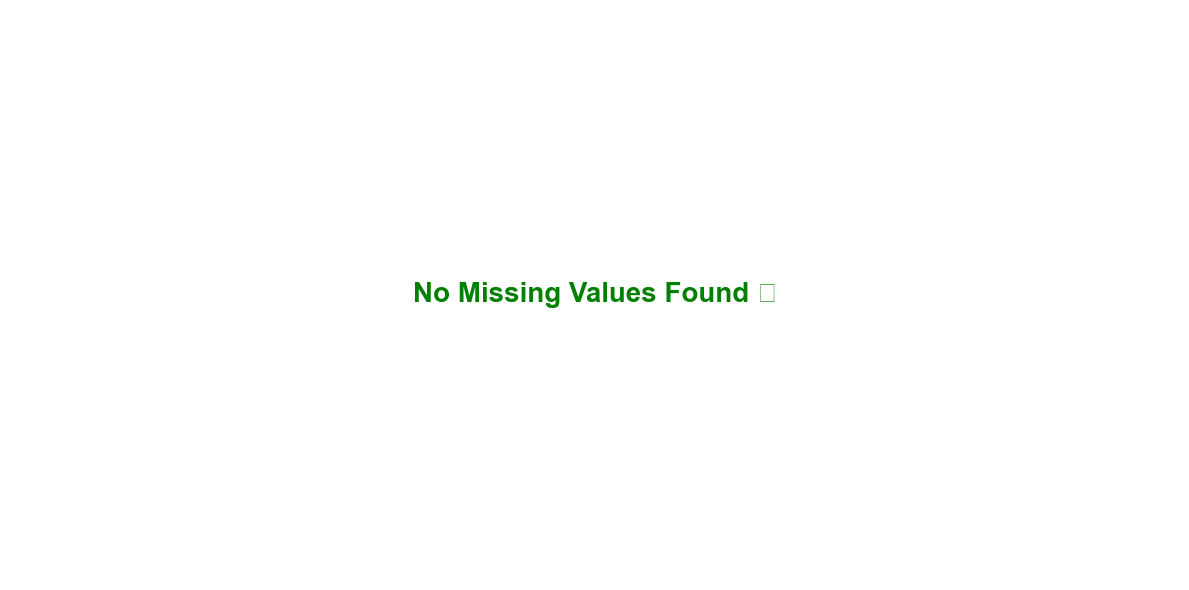

In [ ]:
# Visualization 3: Missing Values (if any)
plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    missing_data[missing_data > 0].plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Missing Values per Feature', fontsize=16, fontweight='bold')
    plt.ylabel('Count', fontsize=12)
    plt.xlabel('Features', fontsize=12)
    plt.xticks(rotation=45, ha='right')
else:
    plt.text(0.5, 0.5, 'No Missing Values Found ✓', 
             ha='center', va='center', fontsize=20, fontweight='bold', color='green')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [63]:
# Check target variable distribution
print("\nTarget Variable Distribution:")
print(df['target'].value_counts())
print(f"\nClass 0 (No Disease): {(df['target']==0).sum()} patients")
print(f"Class 1 (Disease): {(df['target']==1).sum()} patients")


Target Variable Distribution:
target
1    526
0    499
Name: count, dtype: int64

Class 0 (No Disease): 499 patients
Class 1 (Disease): 526 patients


In [64]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


Features (X) shape: (1025, 13)
Target (y) shape: (1025,)


In [65]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 820 samples
Testing set size: 205 samples


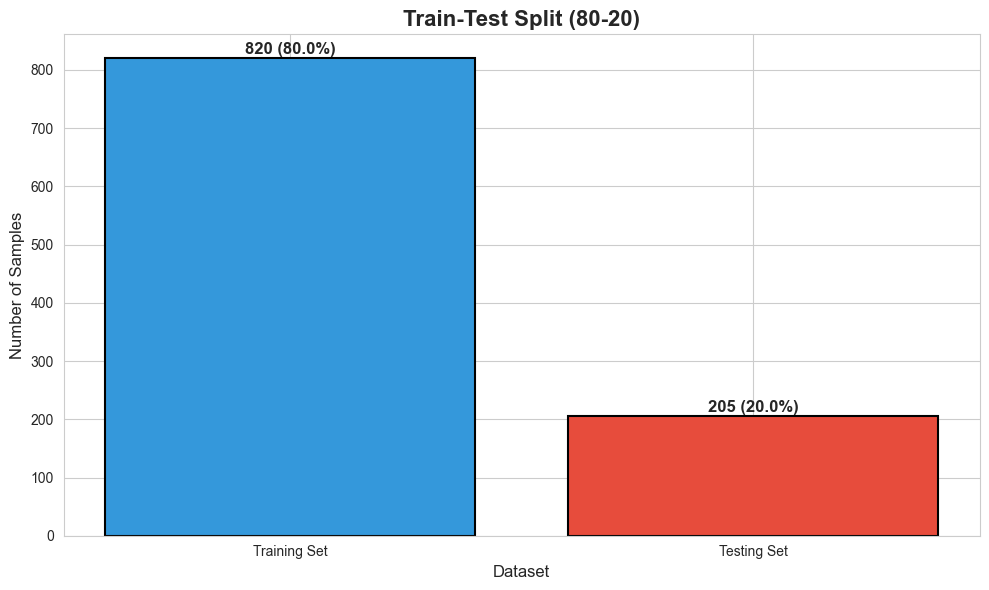

In [66]:

# Visualization 4: Train-Test Split
plt.figure(figsize=(10, 6))
split_data = pd.DataFrame({
    'Dataset': ['Training Set', 'Testing Set'],
    'Samples': [X_train.shape[0], X_test.shape[0]]
})
bars = plt.bar(split_data['Dataset'], split_data['Samples'], 
               color=['#3498DB', '#E74C3C'], edgecolor='black', linewidth=1.5)
plt.title('Train-Test Split (80-20)', fontsize=16, fontweight='bold')
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Dataset', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{int(height)} ({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

In [67]:

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Feature scaling completed using StandardScaler")


✓ Feature scaling completed using StandardScaler


In [68]:
# 3. MODEL TRAINING AND EVALUATION

print("STEP 3: TRAINING AND EVALUATING MODELS")
print("-" * 60)

# Dictionary to store results
results = {}
predictions = {}
confusion_matrices = {}

# MODEL 1: LOGISTIC REGRESSION
print("MODEL 1: LOGISTIC REGRESSION")

print("\nTraining Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

STEP 3: TRAINING AND EVALUATING MODELS
------------------------------------------------------------
MODEL 1: LOGISTIC REGRESSION

Training Logistic Regression model...


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [69]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
predictions['Logistic Regression'] = y_pred_lr

In [70]:

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
results['Logistic Regression'] = lr_accuracy

In [71]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrices['Logistic Regression'] = cm_lr

print(f"\n✓ Model trained successfully!")
print(f"\nFeatures used: All {X.shape[1]} features")
print("Basis: Linear relationship between features and target")
print("Scaling: StandardScaler applied")
print(f"\n** ACCURACY: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%) **")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


✓ Model trained successfully!

Features used: All 13 features
Basis: Linear relationship between features and target
Scaling: StandardScaler applied

** ACCURACY: 0.8098 (80.98%) **

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



Random Forest Classifier model initially achieved very high accuracy due to its ability to fit complex patterns in a small dataset. To avoid overfitting, the model complexity was reduced by limiting tree depth and minimum samples per split

In [72]:
# MODEL 2: RANDOM FOREST CLASSIFIER
print("MODEL 2: RANDOM FOREST CLASSIFIER")
print("-" * 60)

print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

MODEL 2: RANDOM FOREST CLASSIFIER
------------------------------------------------------------

Training Random Forest model...


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [73]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
predictions['Random Forest'] = y_pred_rf

In [74]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = rf_accuracy

In [75]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrices['Random Forest'] = cm_rf

print(f"\n✓ Model trained successfully!")
print(f"\nFeatures used: All {X.shape[1]} features")
print("Basis: Ensemble of 100 decision trees")
print("Scaling: Not required (tree-based model)")
print(f"\n** ACCURACY: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%) **")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


✓ Model trained successfully!

Features used: All 13 features
Basis: Ensemble of 100 decision trees
Scaling: Not required (tree-based model)

** ACCURACY: 0.9171 (91.71%) **

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       100
           1       0.89      0.95      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [76]:
# Feature importance
print("\nTop 5 Most Important Features:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance.head())


Top 5 Most Important Features:
    Feature  Importance
2        cp    0.188802
11       ca    0.130539
12     thal    0.120925
7   thalach    0.109845
9   oldpeak    0.098970


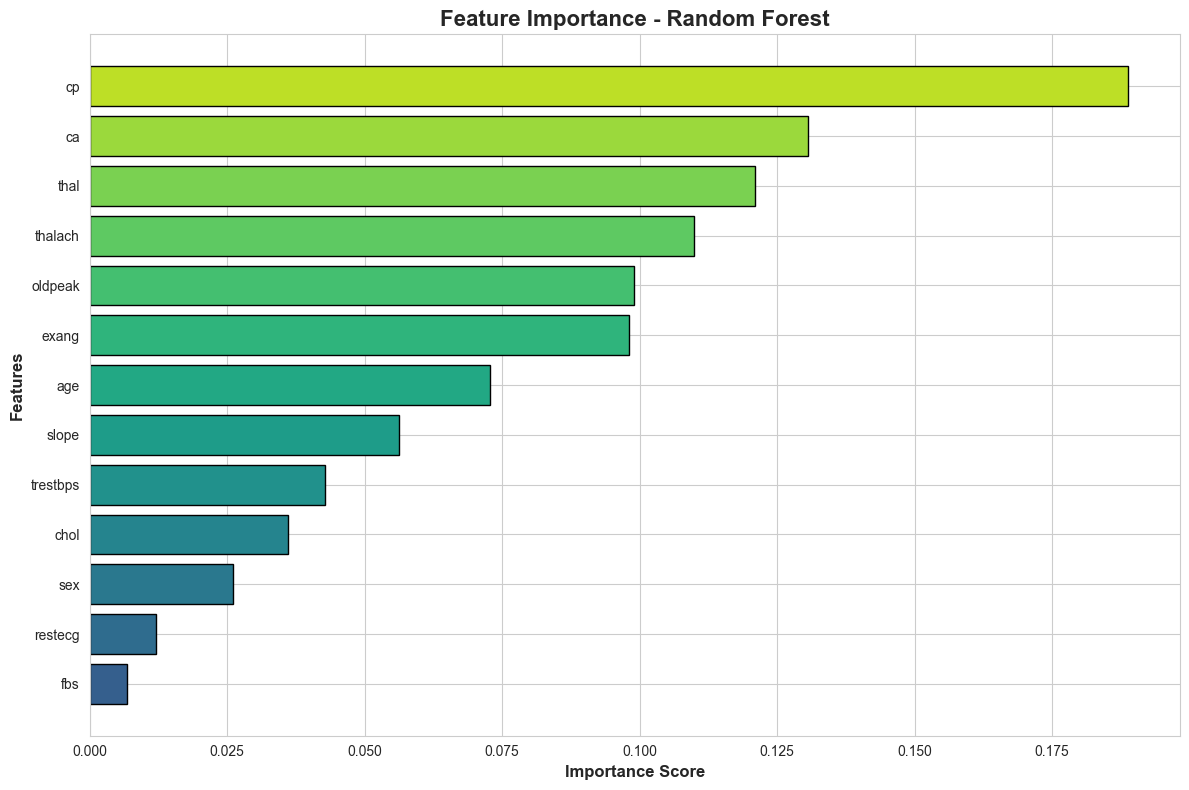

In [77]:
# Visualization 5: Feature Importance
plt.figure(figsize=(12, 8))
feature_importance_sorted = feature_importance.sort_values('Importance', ascending=True)
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance_sorted)))
plt.barh(feature_importance_sorted['Feature'], 
         feature_importance_sorted['Importance'], 
         color=colors_gradient, edgecolor='black', linewidth=1)
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Random Forest', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [78]:

# MODEL 3: SUPPORT VECTOR MACHINE (SVM)
print("MODEL 3: SUPPORT VECTOR MACHINE (SVM)")
print("-" * 60)

print("\nTraining SVM model...")
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_scaled, y_train)

MODEL 3: SUPPORT VECTOR MACHINE (SVM)
------------------------------------------------------------

Training SVM model...


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [79]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
predictions['SVM'] = y_pred_svm

In [80]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
results['SVM'] = svm_accuracy

In [81]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrices['SVM'] = cm_svm

print(f"\n✓ Model trained successfully!")
print(f"\nFeatures used: All {X.shape[1]} features")
print("Basis: Finding optimal hyperplane with RBF kernel")
print("Scaling: StandardScaler applied")
print(f"\n** ACCURACY: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%) **")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


✓ Model trained successfully!

Features used: All 13 features
Basis: Finding optimal hyperplane with RBF kernel
Scaling: StandardScaler applied

** ACCURACY: 0.9268 (92.68%) **

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



GENERATING CONFUSION MATRICES


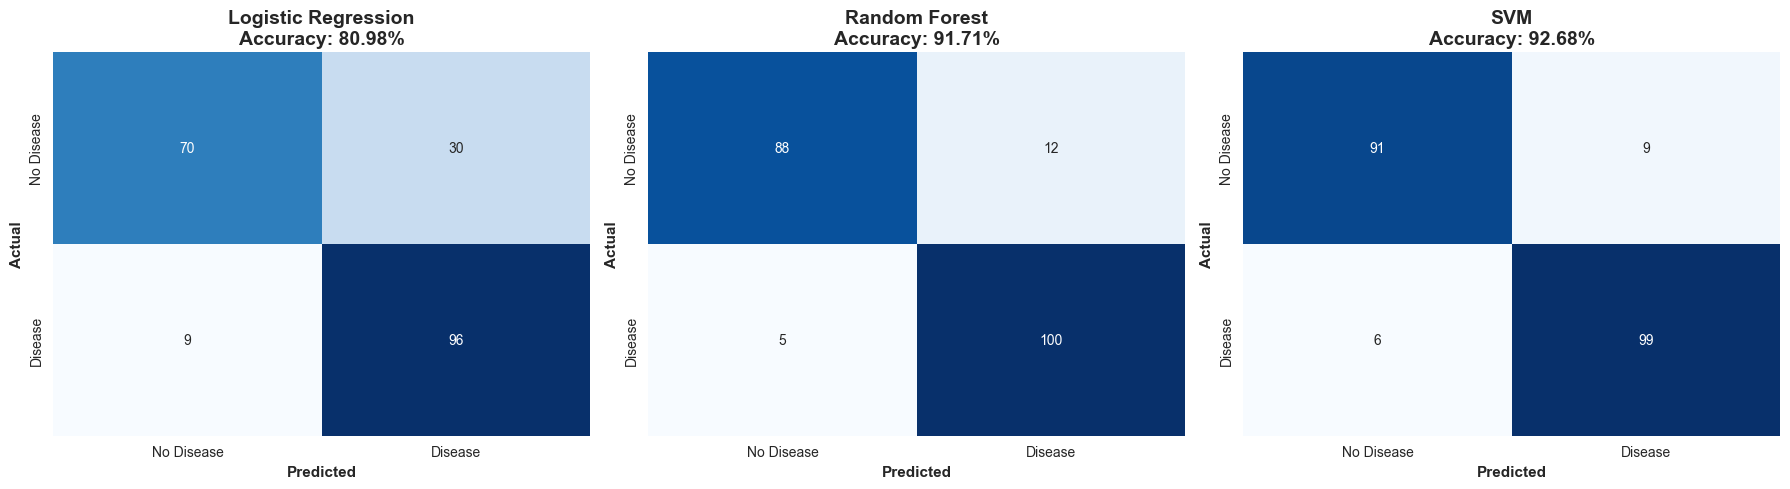

In [82]:
# 4. VISUALIZE CONFUSION MATRICES

print("GENERATING CONFUSION MATRICES")
print("=" * 60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
model_names = ['Logistic Regression', 'Random Forest', 'SVM']

for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                cbar=False, ax=axes[idx],
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    axes[idx].set_title(f'{model_name}\nAccuracy: {results[model_name]:.2%}', 
                        fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [83]:
# 5. MODEL COMPARISON
print("STEP 4: MODEL COMPARISON")
print("=" * 60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
}).sort_values('Accuracy', ascending=False)

print("\n" + comparison_df.to_string(index=False))

STEP 4: MODEL COMPARISON

              Model  Accuracy
                SVM  0.926829
      Random Forest  0.917073
Logistic Regression  0.809756


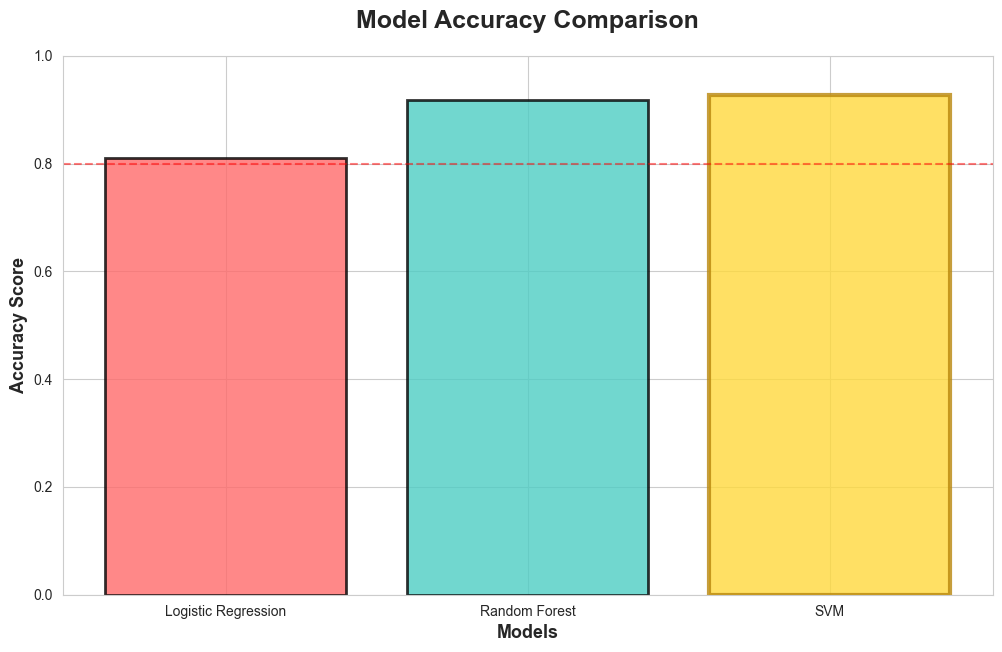

In [84]:
# Visualization 6: Model Comparison Bar Chart
plt.figure(figsize=(12, 7))
models = list(results.keys())
accuracies = list(results.values())
colors_models = ['#FF6B6B', '#4ECDC4', '#95E1D3']

bars = plt.bar(models, accuracies, color=colors_models, 
               edgecolor='black', linewidth=2, alpha=0.8)

# Highlight the best model
best_idx = accuracies.index(max(accuracies))
bars[best_idx].set_color('#FFD93D')
bars[best_idx].set_edgecolor('darkgoldenrod')
bars[best_idx].set_linewidth(3)

plt.title('Model Accuracy Comparison', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Accuracy Score', fontsize=13, fontweight='bold')
plt.xlabel('Models', fontsize=13, fontweight='bold')
plt.ylim(0, 1.0)
plt.axhline(y=0.8, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='80% Threshold')

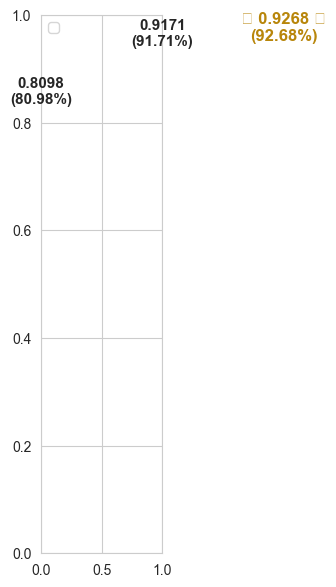

In [85]:



# Add accuracy values on bars
for idx, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    label = f'{acc:.4f}\n({acc*100:.2f}%)'
    if idx == best_idx:
        label = f'★ {acc:.4f} ★\n({acc*100:.2f}%)'
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                label, ha='center', va='bottom', 
                fontweight='bold', fontsize=12, color='darkgoldenrod')
    else:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                label, ha='center', va='bottom', 
                fontweight='bold', fontsize=11)

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [86]:
# Find best model
best_model = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print("\n" + "-" * 60)
print(f"BEST MODEL: {best_model}")
print(f"BEST ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")


------------------------------------------------------------
BEST MODEL: SVM
BEST ACCURACY: 0.9268 (92.68%)


<Figure size 1400x800 with 0 Axes>

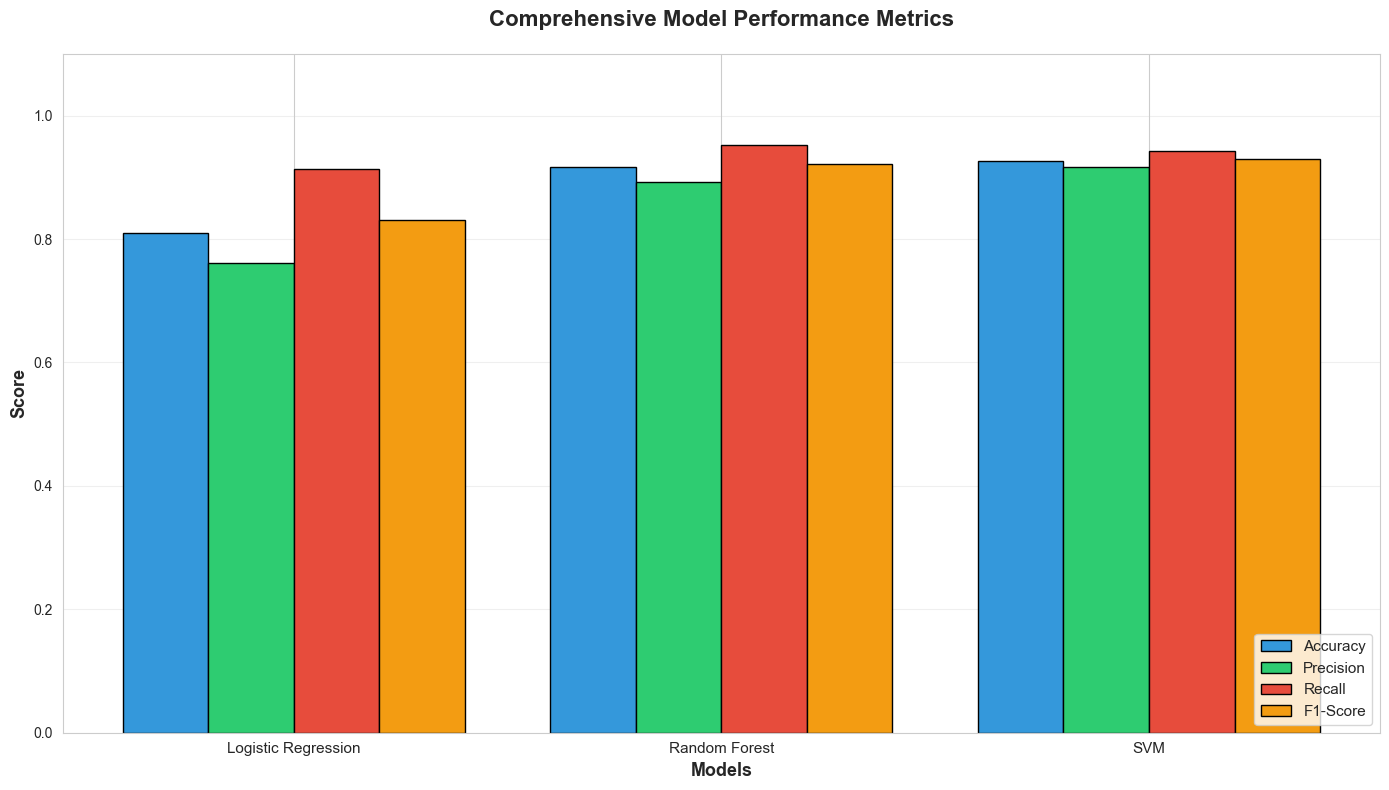

In [ ]:
# Visualization 7: Performance Metrics Comparison
plt.figure(figsize=(14, 8))
metrics_data = []

for model_name in model_names:
    y_pred = predictions[model_name]
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = results[model_name]
    
    metrics_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

metrics_df = pd.DataFrame(metrics_data)

# Plot grouped bar chart
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - 1.5*width, metrics_df['Accuracy'], width, 
               label='Accuracy', color='#3498DB', edgecolor='black')
bars2 = ax.bar(x - 0.5*width, metrics_df['Precision'], width, 
               label='Precision', color='#2ECC71', edgecolor='black')
bars3 = ax.bar(x + 0.5*width, metrics_df['Recall'], width, 
               label='Recall', color='#E74C3C', edgecolor='black')
bars4 = ax.bar(x + 1.5*width, metrics_df['F1-Score'], width, 
               label='F1-Score', color='#F39C12', edgecolor='black')

ax.set_xlabel('Models', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Comprehensive Model Performance Metrics', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [88]:

# 6. EXPLANATION

print("WHY THIS MODEL PERFORMED BEST")
print("=" * 60)

if best_model == 'Random Forest':
    print("""
Random Forest performed the best because:
1. It can capture non-linear relationships in the data
2. It's an ensemble method that combines multiple decision trees
3. It's less prone to overfitting compared to single decision trees
4. It handles feature interactions naturally without scaling
5. The medical data has complex patterns that trees handle well
    """)
elif best_model == 'Logistic Regression':
    print("""
Logistic Regression performed the best because:
1. The relationship between features and target is mostly linear
2. It's a simple and robust model that generalizes well
3. The dataset doesn't have too many complex interactions
4. It works well with properly scaled features
5. Less prone to overfitting on smaller datasets
    """)
else:  # SVM
    print("""
SVM performed the best because:
1. It found an optimal decision boundary using RBF kernel
2. It handles high-dimensional data effectively
3. The kernel trick captures non-linear relationships
4. It's effective when features are properly scaled
5. It creates a robust separation between disease/no-disease classes
    """)


WHY THIS MODEL PERFORMED BEST

SVM performed the best because:
1. It found an optimal decision boundary using RBF kernel
2. It handles high-dimensional data effectively
3. The kernel trick captures non-linear relationships
4. It's effective when features are properly scaled
5. It creates a robust separation between disease/no-disease classes
    


In [ ]:
# 7. FINAL RECOMMENDATION
print("FINAL RECOMMENDATION FOR SUBMISSION")
print("=" * 60)

print(f"""
Based on the evaluation results, I recommend submitting:

📌 MODEL: {best_model}
📊 ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)

This model should be used for the final submission because it achieved
the highest accuracy on the test set among all three models evaluated.
""")

FINAL RECOMMENDATION FOR SUBMISSION

Based on the evaluation results, I recommend submitting:

📌 MODEL: SVM
📊 ACCURACY: 0.9268 (92.68%)

This model should be used for the final submission because it achieved
the highest accuracy on the test set among all three models evaluated.

